## INFO 2950 Final Project: Insert Title Here

## Table of Contents
1. Introduction
    a. Key Terms
    b. Research Questions
    c. Summary of Findings
2. Data Description
3. Preregistration Statements
4. Data Analysis
5. Evaluation of Significance
6. Interpretation and Conclusions
7. Limitations
8. Appendix - Data Cleaning

## Introduction


## Research Question:
Our research aims to understand which factors correlate with the general life satisfaction of various countries. Areas we are interested in analyzing include economic, health, and demography factors. In the economic realm, we want to understand how economic factors, such as GDP, minimum wage, cost of living, and crime rate can affect life satisfaction. In health, we are interested in understanding the link between suicides and mental disorders with happiness. For demography, we seek to understand if there are patterns between infant mortality rate, maternal mortality ratio, birth rate, and life expectancy with happiness.

Overall, which factors are the most prominent in influencing “happiness”? How can we predict the impact of different factors on countries’ life satisfaction? 

TEst change is it changing? 


Add something- lauren

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import duckdb

## Data Description:

### __MOTIVATION__
__Why was this dataset created?__
- Our dataset was created to observe the factors that influenced life satisfaction in various countries. We wanted to isolate factors that demonstrated the strongest correlation to overall happiness. The five datasets we analyzed all compared individual factors that would influence or measure the wellbeing of the country. Their purpose was to capture the overall state of different countries. 

__Who funded the creation of the dataset?__
- These datasets took information from organizations like the “World Health Organization”, “World bank” statistics, United Nations Statistics, and other datasets. It is unclear who funded these datasets. 
### __Composition__
__Is any information missing from individual instances?__
- There is information missing from individual instances, such as data from smaller countries like Andorra, which may have less resources to collect the data. These rows of missing values have been removed.

__What are the observations (rows) and the attributes (columns)?__

- For these datasets, the rows are the names of countries, and the columns are health, economic, and demography factors. These include number of suicides, infant mortality rate, crime rates, and so on. 

__What processes might have influenced what data was observed and recorded and what was not?__
- The data has mainly been collected from research studies, using methods such as surveys. Thus, there could be several biases that could have influenced data collection, such as selection bias, sampling bias, and social desirability bias.


### __Collection Process__
__How was the data associated with each instance acquired?__
- We gathered the data from various CSV files in order to analyze various facets of influential attributes that impacted a nation. The individual CSV files took data from large health organizations that measured population statistics. Some examples are the "https://ourworldindata.org/", the "Sustainable Development Solutions Network", and the "World Health Organization".

__Over what timeframe was the data collected?__
- Our research analyzed data from the year 2013 to 2023. This data allows us to predict the more recent trends in Happiness levels, GDP, birth rate, etc. 

__What preprocessing was done, and how did the data come to be in the form that you are using?__
- The data scrapped data from large organizations that provided public data. They also took data from previous research studies that used the same data. The data was changed to its current form once we removed less relevant columns and collected the correlation value. Additionally we dropped empty column values to focus on the analyzable data. 

### __Uses__
__Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).__

Overall, we used 6 datasets. They can be found in their raw data sources as follows. 

1. Mental health disorders dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/Mental%20health%20Depression%20disorder%20Data.csv

2. Suicide dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/master.csv

3. Demography and economic information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/world-data-2023.csv

4. Crime information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/crime-rate-by-country-2023.csv

5. Country and continent dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/countryContinent.csv

6. Happiness information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/2022.csv

__What (other) tasks could the dataset be used for?__
- These datasets contain a lot of rich information that can be used for a variety of different tasks. For example, other ideas that could be studied include the patterns between education levels and human development, between labor force participation and overall economic performance, and between urbanization trends and environmental consequences.

__Are there tasks for which the dataset should not be used?__
- Some potential tasks that these data should not be used for are visualizing trends over time, because not all the datasets include data over time. Additionally, further verification of the data should be done before using it to inform any policy recommendations.




## Data Cleaning:

### Happiness table

First we loaded in the Happiness CSV file

In [51]:
#load the world happiness score of 2022
happiness_df = pd.read_csv('2022.csv', thousands=',')
print(happiness_df.shape)

(147, 12)


The original dataset displays the world happiness country ranking of 2022 and scores from various perspectives. We removed the rows with empty data and are only keeping the happiness rank, happiness score, and country name for further analysis.

In [52]:

#drop the rows where any of these columns is empty.
happiness_df = happiness_df.dropna(subset=['Country', 'Happiness score'])

#select the 'Happiness rank' and 'Country' columns from the dataset
happiness_df = happiness_df[['Country', 'Happiness score']]

print(happiness_df.shape)
happiness_df

(146, 2)


,Country,Happiness score
0,Finland,7821.0
1,Denmark,7636.0
2,Iceland,7557.0
3,Switzerland,7512.0
4,Netherlands,7415.0
...,...,...
141,Botswana*,3471.0
142,Rwanda*,3268.0
143,Zimbabwe,2995.0
144,Lebanon,2955.0


### Economy and Crime

Note: we are printing dataframe below because there are so many columns that it goes off the page when presented as a table. Printing allows for all the columns of data to be visible. For this project, we will print the dataframes that have columns going off the page. For the other dataframes, we will present them as tables since that provides for easier viewing.

In [100]:
#load the economic data of countries for 2023
econ_df = pd.read_csv('world-data-2023.csv', thousands=',')
print(econ_df.shape)
print(econ_df)

(195, 35)
         Country  Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan                60           AF                58.10%   
1        Albania               105           AL                43.10%   
2        Algeria                18           DZ                17.40%   
3        Andorra               164           AD                40.00%   
4         Angola                26           AO                47.50%   
..           ...               ...          ...                   ...   
190    Venezuela                32           VE                24.50%   
191      Vietnam               314           VN                39.30%   
192        Yemen                56           YE                44.60%   
193       Zambia                25           ZM                32.10%   
194     Zimbabwe                38           ZW                41.90%   

     Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0          652230.0           323000.0       

The original dataset includes basic information about 195 countries with 35 attributes for each country, such as population density, abbreviation, and much more. We are only using information regarding the economy from this dataset, such as GDP, to analyze how economic factors within countries affect citizens’ happiness. We cleaned the rows with missing data and renamed some of the columns to clarify the unit and explain the economic terms. We created a column called ‘GDP Per Capita’ based on the provided GDP and Population information and divided them to gain this essential metric of economics. In addition, we removed special signs such as dollar signs and percentage signs and converted them to numbers for later analysis. We ended up with data for 128 countries.

In [54]:
#calculate the GDP Per Capita 
econ_df['GDP'] = econ_df['GDP'].str.replace(',', '') #remove commas
econ_df['GDP'] = econ_df['GDP'].str.replace('$', '') #remove dollar sign 
econ_df['GDP'] = pd.to_numeric(econ_df['GDP'], errors='coerce') #convert to numeric
econ_df['GDP Per Capita'] = econ_df['GDP'] / econ_df['Population']

econ_df['Minimum wage'] = econ_df['Minimum wage'].str.replace('$', '') #remove dollar sign 
econ_df['Minimum wage'] = pd.to_numeric(econ_df['Minimum wage'], errors='coerce') #convert to numeric

econ_df['Tax revenue (%)'] = econ_df['Tax revenue (%)'].str.replace('%', '') #remove percentage sign
econ_df['Tax revenue (%)'] = pd.to_numeric(econ_df['Tax revenue (%)'], errors='coerce') #convert to numeric
econ_df['Unemployment rate'] = econ_df['Unemployment rate'].str.replace('%', '') #remove percentage sign

#rename the columns for better clarification 
econ_df.rename(columns={'CPI': 'Consumer Price Index'}, inplace=True)
econ_df.rename(columns={'Unemployment rate': 'Unemployment rate(%)'}, inplace=True)
econ_df.rename(columns={'GDP': 'GDP($)'}, inplace=True)
econ_df.rename(columns={'Minimum wage': 'Minimum wage($)'}, inplace=True)

#select the columns related to the economy factor
econ_df = econ_df[['Country', 'GDP($)', 'Population', 'GDP Per Capita',
                   'Minimum wage($)', 'Unemployment rate(%)',
                   'Consumer Price Index', 'Tax revenue (%)']]

#drop the rows where any of these columns is empty.
econ_df = econ_df.dropna(subset=['Country', 'GDP($)', 'Population', 
                                 'GDP Per Capita','Minimum wage($)', 
                                 'Unemployment rate(%)','Consumer Price Index', 
                                 'Tax revenue (%)'])

print(econ_df.shape)
econ_df

(128, 8)


,Country,GDP($),Population,GDP Per Capita,Minimum wage($),Unemployment rate(%),Consumer Price Index,Tax revenue (%)
0,Afghanistan,1.910135e+10,38041754.0,502.115487,0.43,11.12,149.90,9.3
1,Albania,1.527808e+10,2854191.0,5352.857411,1.12,12.33,119.05,18.6
2,Algeria,1.699882e+11,43053054.0,3948.343279,0.95,11.70,151.36,37.2
4,Angola,9.463542e+10,31825295.0,2973.591160,0.71,6.89,261.73,9.2
6,Argentina,4.496634e+11,44938712.0,10006.148974,3.35,9.79,232.75,10.1
...,...,...,...,...,...,...,...,...
186,United States,2.142770e+13,328239523.0,65280.682241,7.25,14.70,117.24,9.6
187,Uruguay,5.604591e+10,3461734.0,16190.126957,1.66,8.73,202.92,20.1
189,Vanuatu,9.170589e+08,299882.0,3058.065676,1.56,4.39,117.13,17.8
191,Vietnam,2.619212e+11,96462106.0,2715.276036,0.73,2.01,163.52,19.1


Next we loaded the crime data for countries during the year 2023

In [55]:
#load the crime data of countries for 2023
crime_df = pd.read_csv('crime-rate-by-country-2023.csv', thousands=',')
print(crime_df.shape)
crime_df

(133, 4)


,rank,country,crimeIndex,pop2023
0,1,Venezuela,83.76,28838499.0
1,2,Papua New Guinea,80.79,10329931.0
2,3,South Africa,76.86,60414495.0
3,4,Afghanistan,76.31,42239854.0
4,5,Honduras,74.54,10593798.0
...,...,...,...,...
128,129,Switzerland,21.62,8796669.0
129,130,Oman,20.34,4644384.0
130,131,Taiwan,15.46,23923276.0
131,132,United Arab Emirates,15.23,9516871.0


For the Crime dataset, we are renaming the ‘rank’ column to ‘Crime rank’ to avoid conflict with ‘Happiness rank’ after merging the dataframes. We are also renaming ‘country’ to ‘Country’ so that we can merge these three dataframes based on the ‘Country’ column. Additionally, we are renaming ‘crimeIndex’ to ‘Crime Index’ to keep the first letter capitalized for consistency. We are deleting the ‘pop2023’ column as it will be repetitive information. We are again dropping rows with empty data, but in this case, none of them are dropped.

In [56]:
#rename columns
crime_df.rename(columns={'country': 'Country'}, inplace=True) 
crime_df.rename(columns={'crimeIndex': 'Crime Index'}, inplace=True)
crime_df.rename(columns={'rank': 'Crime rank'}, inplace=True)

#select columns
crime_df=crime_df[['Country','Crime rank','Crime Index']]

#drop the rows where any of these columns is empty.
crime_df=crime_df.dropna(subset=['Country', 'Crime Index','Crime rank'])

print(crime_df.shape)
crime_df

(133, 3)


,Country,Crime rank,Crime Index
0,Venezuela,1,83.76
1,Papua New Guinea,2,80.79
2,South Africa,3,76.86
3,Afghanistan,4,76.31
4,Honduras,5,74.54
...,...,...,...
128,Switzerland,129,21.62
129,Oman,130,20.34
130,Taiwan,131,15.46
131,United Arab Emirates,132,15.23


After merging the three DataFrames (econ_df, crime_df, and happiness_df) using the 'Country' column with inner joins, we now have data for analysis from 81 countries.

In [57]:
#merge three dataframes into a single data set 
merged_df = pd.merge(econ_df, crime_df, on='Country', how='inner')
merged_df = pd.merge(merged_df, happiness_df, on='Country', how='inner')
print(merged_df.shape)
merged_df

(81, 11)


,Country,GDP($),Population,GDP Per Capita,Minimum wage($),Unemployment rate(%),Consumer Price Index,Tax revenue (%),Crime rank,Crime Index,Happiness score
0,Afghanistan,1.910135e+10,38041754.0,502.115487,0.43,11.12,149.90,9.3,4,76.31,2404.0
1,Albania,1.527808e+10,2854191.0,5352.857411,1.12,12.33,119.05,18.6,76,42.53,5199.0
2,Algeria,1.699882e+11,43053054.0,3948.343279,0.95,11.70,151.36,37.2,42,52.03,5122.0
3,Argentina,4.496634e+11,44938712.0,10006.148974,3.35,9.79,232.75,10.1,17,63.82,5967.0
4,Armenia,1.367280e+10,2957731.0,4622.733493,0.66,16.99,129.18,20.9,125,22.79,5399.0
...,...,...,...,...,...,...,...,...,...,...,...
76,United Kingdom,2.827113e+12,66834405.0,42300.267126,10.13,3.85,119.62,25.5,63,46.07,6943.0
77,United States,2.142770e+13,328239523.0,65280.682241,7.25,14.70,117.24,9.6,55,47.81,6977.0
78,Uruguay,5.604591e+10,3461734.0,16190.126957,1.66,8.73,202.92,20.1,44,51.73,6474.0
79,Vietnam,2.619212e+11,96462106.0,2715.276036,0.73,2.01,163.52,19.1,62,46.19,5485.0


### Demography
Here we will import a dataframe that contains information about demography factors across different countries. This will be compared to countries' happiness scores to understand if there are any trends or patterns.

In [101]:
world_data_df = pd.read_csv("world-data-2023.csv", thousands = ",")
print(world_data_df)

         Country  Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan                60           AF                58.10%   
1        Albania               105           AL                43.10%   
2        Algeria                18           DZ                17.40%   
3        Andorra               164           AD                40.00%   
4         Angola                26           AO                47.50%   
..           ...               ...          ...                   ...   
190    Venezuela                32           VE                24.50%   
191      Vietnam               314           VN                39.30%   
192        Yemen                56           YE                44.60%   
193       Zambia                25           ZM                32.10%   
194     Zimbabwe                38           ZW                41.90%   

     Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0          652230.0           323000.0       32.49     

Now we rename our columns of interest to have proper syntax so they are easy to access. The factors we are interested in looking at are birth rate, infant mortality, life expectancy, and maternal mortality ratio.

In [102]:
world_data_df = world_data_df.rename(columns={'Birth Rate': 'birth_rate', 
                'Infant mortality': 'infant_mortality', 
                'Life expectancy': 'life_expectancy', 
                'Maternal mortality ratio': 'maternal_mortality_ratio'})
print(world_data_df)

         Country  Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan                60           AF                58.10%   
1        Albania               105           AL                43.10%   
2        Algeria                18           DZ                17.40%   
3        Andorra               164           AD                40.00%   
4         Angola                26           AO                47.50%   
..           ...               ...          ...                   ...   
190    Venezuela                32           VE                24.50%   
191      Vietnam               314           VN                39.30%   
192        Yemen                56           YE                44.60%   
193       Zambia                25           ZM                32.10%   
194     Zimbabwe                38           ZW                41.90%   

     Land Area(Km2)  Armed Forces size  birth_rate  Calling Code  \
0          652230.0           323000.0       32.49     

Here we modify our dataframe to include only the columns that are relevant for our analysis. This results in a cleaner, less cluttered dataframe. Columns with NaN values are dropped, so that there are no missing data values present.

In [60]:
world_data_df = duckdb.sql("SELECT Country, birth_rate, infant_mortality, \
life_expectancy, maternal_mortality_ratio FROM world_data_df").df()
world_data_df = world_data_df.dropna()
world_data_df

,Country,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
0,Afghanistan,32.49,47.9,64.5,638.0
1,Albania,11.78,7.8,78.5,15.0
2,Algeria,24.28,20.1,76.7,112.0
4,Angola,40.73,51.6,60.8,241.0
5,Antigua and Barbuda,15.33,5.0,76.9,42.0
...,...,...,...,...,...
190,Venezuela,17.88,21.4,72.1,125.0
191,Vietnam,16.75,16.5,75.3,43.0
192,Yemen,30.45,42.9,66.1,164.0
193,Zambia,36.19,40.4,63.5,213.0


Next, we will refer back to the Happiness Score we used previously

In [61]:
happiness_df

,Country,Happiness score
0,Finland,7821.0
1,Denmark,7636.0
2,Iceland,7557.0
3,Switzerland,7512.0
4,Netherlands,7415.0
...,...,...
141,Botswana*,3471.0
142,Rwanda*,3268.0
143,Zimbabwe,2995.0
144,Lebanon,2955.0


Here, we join the world data dataframe, which contains relevant demography statistics by country, to the world happiness dataframe, which includes happiness scores by country. This creates a single dataframe with all the relevant information for analysis between demography statistics and happiness.

In [62]:
demography_df = duckdb.sql("SELECT world_data_df.Country, birth_rate, \
infant_mortality, life_expectancy, maternal_mortality_ratio, \
\"Happiness score\" FROM world_data_df INNER JOIN happiness_df \
ON world_data_df.Country = happiness_df.Country").df()
demography_df

,Country,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
0,Afghanistan,32.49,47.9,64.5,638.0,2404.0
1,Albania,11.78,7.8,78.5,15.0,5199.0
2,Algeria,24.28,20.1,76.7,112.0,5122.0
3,Armenia,13.99,11.0,74.9,26.0,5399.0
4,Australia,12.60,3.1,82.7,6.0,7162.0
...,...,...,...,...,...,...
113,Kazakhstan,21.77,8.8,73.2,10.0,6234.0
114,Lithuania,10.00,3.3,75.7,8.0,6446.0
115,Nigeria,37.91,75.7,54.3,917.0,4552.0
116,Romania,9.60,6.1,75.4,19.0,6477.0


Additionally, we are adding some regional data, specifically continent and subregion, to help categorize groups of countries.

In [63]:
continent_df = pd.read_csv("countryContinent.csv", encoding='ISO-8859-1')
continent_df

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


The dataframe is cleaned to only include relevant variables.

In [64]:
continent_df = duckdb.sql("SELECT country, continent, sub_region FROM \
continent_df").df()
continent_df

,country,continent,sub_region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Eastern Africa


Then it is joined to the demography data.

In [65]:
demography_df = duckdb.sql("SELECT continent_df.country, continent, \
sub_region, birth_rate, infant_mortality, life_expectancy, \
maternal_mortality_ratio, \"Happiness score\", FROM continent_df INNER JOIN \
demography_df ON continent_df.country = demography_df.Country").df()
demography_df

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
0,Afghanistan,Asia,Southern Asia,32.49,47.9,64.5,638.0,2404.0
1,Albania,Europe,Southern Europe,11.78,7.8,78.5,15.0,5199.0
2,Algeria,Africa,Northern Africa,24.28,20.1,76.7,112.0,5122.0
3,Armenia,Asia,Western Asia,13.99,11.0,74.9,26.0,5399.0
4,Australia,Oceania,Australia and New Zealand,12.60,3.1,82.7,6.0,7162.0
...,...,...,...,...,...,...,...,...
101,Austria,Europe,Western Europe,9.70,2.9,81.6,5.0,7163.0
102,Ecuador,Americas,South America,19.72,12.2,76.8,59.0,5533.0
103,Lithuania,Europe,Northern Europe,10.00,3.3,75.7,8.0,6446.0
104,Romania,Europe,Eastern Europe,9.60,6.1,75.4,19.0,6477.0


The data can then be separated into dataframes by continent for further analysis.

In [66]:
asia = demography_df[demography_df['continent'] == 'Asia']
asia

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
0,Afghanistan,Asia,Southern Asia,32.49,47.9,64.5,638.0,2404.0
3,Armenia,Asia,Western Asia,13.99,11.0,74.9,26.0,5399.0
5,Bahrain,Asia,Western Asia,13.99,6.1,77.2,14.0,6647.0
6,Bangladesh,Asia,Southern Asia,18.18,25.1,72.3,173.0,5155.0
13,Cambodia,Asia,South-Eastern Asia,22.46,24.0,69.6,160.0,4640.0
17,China,Asia,Eastern Asia,10.90,7.4,77.0,29.0,5585.0
21,Cyprus,Asia,Western Asia,10.46,1.9,80.8,6.0,6221.0
31,Georgia,Asia,Western Asia,13.47,8.7,73.6,25.0,4973.0
39,India,Asia,Southern Asia,17.86,29.9,69.4,145.0,3777.0
40,Indonesia,Asia,South-Eastern Asia,18.07,21.1,71.5,177.0,5240.0


In [104]:
europe = demography_df[demography_df['continent'] == 'Europe']
europe

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
1,Albania,Europe,Southern Europe,11.78,7.8,78.5,15.0,5199.0
7,Belgium,Europe,Western Europe,10.30,2.9,81.6,5.0,6805.0
9,Bosnia and Herzegovina,Europe,Southern Europe,8.11,5.0,77.3,10.0,5768.0
11,Bulgaria,Europe,Eastern Europe,8.90,5.9,74.9,10.0,5371.0
20,Croatia,Europe,Southern Europe,9.00,4.0,78.1,8.0,6125.0
22,Denmark,Europe,Northern Europe,10.60,3.6,81.0,4.0,7636.0
26,Estonia,Europe,Northern Europe,10.90,2.1,78.2,9.0,6341.0
28,Finland,Europe,Northern Europe,8.60,1.4,81.7,3.0,7821.0
29,France,Europe,Western Europe,11.30,3.4,82.5,8.0,6687.0
32,Germany,Europe,Western Europe,9.50,3.1,80.9,7.0,7034.0


In [68]:
africa = demography_df[demography_df['continent'] == 'Africa']
africa

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
2,Algeria,Africa,Northern Africa,24.28,20.1,76.7,112.0,5122.0
8,Benin,Africa,Western Africa,36.22,60.5,61.5,397.0,4623.0
12,Burkina Faso,Africa,Western Africa,37.93,49.0,61.2,320.0,4670.0
14,Cameroon,Africa,Middle Africa,35.39,50.6,58.9,529.0,5048.0
24,Egypt,Africa,Northern Africa,26.38,18.1,71.8,37.0,4288.0
27,Ethiopia,Africa,Eastern Africa,32.34,39.1,66.2,401.0,4241.0
30,Gabon,Africa,Middle Africa,31.61,32.7,66.2,252.0,4958.0
33,Ghana,Africa,Western Africa,29.41,34.9,63.8,308.0,4872.0
35,Guinea,Africa,Western Africa,36.36,64.9,61.2,576.0,4891.0
48,Kenya,Africa,Eastern Africa,28.75,30.6,66.3,342.0,4543.0


In [69]:
oceania = demography_df[demography_df['continent'] == 'Oceania']
oceania

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
4,Australia,Oceania,Australia and New Zealand,12.60,3.1,82.7,6.0,7162.0
66,New Zealand,Oceania,Australia and New Zealand,11.98,4.7,81.9,9.0,7200.0


In [70]:
americas = demography_df[demography_df['continent'] == 'Americas']
americas

,country,continent,sub_region,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
10,Brazil,Americas,South America,13.92,12.8,75.7,60.0,6293.0
15,Canada,Americas,Northern America,10.10,4.3,81.9,10.0,7025.0
16,Chile,Americas,South America,12.43,6.2,80.0,13.0,6172.0
18,Colombia,Americas,South America,14.88,12.2,77.1,83.0,5781.0
19,Costa Rica,Americas,Central America,13.97,7.6,80.1,27.0,6582.0
23,Dominican Republic,Americas,Caribbean,19.51,24.1,73.9,95.0,5737.0
25,El Salvador,Americas,Central America,18.25,11.8,73.1,46.0,6120.0
36,Honduras,Americas,Central America,21.60,15.1,75.1,65.0,6022.0
44,Jamaica,Americas,Caribbean,16.10,12.4,74.4,80.0,5850.0
57,Mexico,Americas,Central America,17.60,11.0,75.0,33.0,6128.0


### Health

First we load in the CSV files analyze suicide rates and mental health disorders in various countries

In [71]:
suicide_df = pd.read_csv('master.csv')
mental_health_df = pd.read_csv('Mental health Depression disorder Data.csv', dtype='unicode')
# https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

#### Mental Disorders
We begin by removing unnecessary columns from the data frame

In [72]:
mental_health_df.drop('Code', axis=1, inplace=True)

We rename the columns to make them more intuitive. We renamed the "Entity" column to the "Country". Then we removed the missing values from the dataframe to ensure we only focus on the relevant data.

In [73]:
#Rename the Entity column to countries
mental_health_df = mental_health_df.rename(columns={'Entity': 'Country'})

# #Remove NaN
mental_health_df = mental_health_df.dropna()

The "Year" column wasn't an int, so we changed it to make it easier to remove and select years later on. We deleted years before 2013 since we wanted to collect more recent data. 

In [74]:
# Make years into int, since it was an object before
mental_health_df['Year'] = mental_health_df['Year'].astype(int)

# remove years before 2013 
mental_health_df = mental_health_df[mental_health_df['Year'] >= 2013]

The disorder columns contained errors in its data that needed to be removed. For example, one of its data contained 2 periods instead 1 for percentages. To solve this we converted all the disorders to numeric values and set all non-passing vales as NaN. We then dropped those values.

In [75]:
# Remove the data in the percentages that aren't numeric. Ex) 
columns_to_convert = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
    'Anxiety disorders (%)', 'Drug use disorders (%)',
    'Depression (%)', 'Alcohol use disorders (%)']

# change to numeric, ignore errors
# https://stackoverflow.com/questions/44522741/pandas-mean-typeerror-could-not-convert-to-numeric
mental_health_df[columns_to_convert] = mental_health_df[columns_to_convert].apply(pd.to_numeric, 
                                                                                  errors='coerce')
mental_health_df.dropna(subset=columns_to_convert, inplace=True)

We then grouped the data by country and took the mean of the disorder percentages. We dropped the columns that were not relevant to the final dataframe.

In [76]:
# Group the disorder percentage mean for 2013-2017
averages_by_country = mental_health_df.groupby('Country').mean()
averages_by_country.drop(axis=0, columns=['Year','index'], inplace=True)
averages_by_country.reset_index(inplace=True)
averages_by_country

,Country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.165882,0.707279,0.104365,4.875703,2.533182,4.135129,0.662045
1,Albania,0.200605,0.704141,0.170857,3.387972,0.512789,2.205231,1.847211
2,Algeria,0.197709,0.817824,0.211327,5.058440,1.708282,3.639566,0.665544
3,American Samoa,0.248964,0.468421,0.179106,3.316180,0.769744,2.937838,1.141303
4,Andean Latin America,0.200701,0.881123,0.350026,4.266526,0.666658,2.606462,1.548944
...,...,...,...,...,...,...,...,...
226,Western Sub-Saharan Africa,0.174619,0.636718,0.139599,2.904105,0.483082,3.757981,0.967807
227,World,0.254415,0.596277,0.207662,3.774304,0.930513,3.439976,1.412415
228,Yemen,0.172382,0.735498,0.136447,4.852630,1.400195,4.017016,0.635910
229,Zambia,0.165007,0.605270,0.138857,3.585710,0.507067,3.581924,1.632803


#### Suicide Table

First we renamed the countries column to Country to better align with the other CSV file names. Then we dropped the years before the year 2013 and reset the index for more accurate data collection. 

In [77]:
#Rename the Entity column to countries
suicide_df = suicide_df.rename(columns={'country': 'Country'})

# drop years before 2013
suicide_df = suicide_df[suicide_df['year'] >= 2013]
suicide_df.reset_index(drop=True, inplace=True)

First we added together the suicide numbers if the year and the country was the same. We did this to account for the fact that the data took data based on different age groups. Then, we collected the suicide rates for each country and retook the sum of the suicide number.

In [78]:
# Add the suicide number together if the country and year is the same

suicide_df.rename(columns={'suicides/100k pop': 'suicide_rate'}, inplace=True)
suicide_df = suicide_df.groupby(['Country', 'year'])['suicide_rate'].mean().reset_index()

# Total number of suicides on the most recent years
suicide_2013_to_2017_df = suicide_df.groupby('Country')['suicide_rate'].mean().reset_index()
suicide_2013_to_2017_df

,Country,suicides_no
0,Antigua and Barbuda,1
1,Argentina,9291
2,Armenia,266
3,Australia,8526
4,Austria,5057
...,...,...
79,Ukraine,15542
80,United Kingdom,14522
81,United States,128101
82,Uruguay,1767


Next we will refer back to the Happiness score we had before

In [79]:
happiness_df

,Country,Happiness score
0,Finland,7821.0
1,Denmark,7636.0
2,Iceland,7557.0
3,Switzerland,7512.0
4,Netherlands,7415.0
...,...,...
141,Botswana*,3471.0
142,Rwanda*,3268.0
143,Zimbabwe,2995.0
144,Lebanon,2955.0


#### Merge all 3 tables by country

We merged together the suicide, mental disorder, and happiness score dateframe.

In [80]:
merged_1_2_df= pd.merge(averages_by_country, suicide_2013_to_2017_df, on='Country', how='inner')
health_df = pd.merge(merged_1_2_df, happiness_df, on='Country', how='inner')
health_df

,Country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),suicides_no,Happiness score
0,Argentina,0.197961,0.772578,0.397766,6.278569,0.989317,3.657941,1.823537,9291,5967.0
1,Armenia,0.196526,0.716817,0.164855,2.590217,0.495973,2.740602,1.979112,266,5399.0
2,Australia,0.364150,1.144993,0.942223,6.595998,2.181237,4.694260,1.509925,8526,7162.0
3,Austria,0.256640,0.939808,0.674277,5.345074,0.909465,3.265730,1.879006,5057,7163.0
4,Bahrain,0.206873,0.836296,0.269325,4.657096,1.710888,3.896715,0.731456,14,6647.0
...,...,...,...,...,...,...,...,...,...,...
57,Ukraine,0.190860,0.687293,0.171669,2.941524,0.696986,4.091572,4.816161,15542,5084.0
58,United Kingdom,0.258671,1.086026,0.542953,4.656162,1.696709,4.123517,1.911172,14522,6943.0
59,United States,0.335195,0.651874,0.521523,6.651867,3.272024,4.799864,2.020849,128101,6977.0
60,Uruguay,0.198341,0.780724,0.392434,6.309361,0.933896,3.585823,1.181403,1767,6474.0


## Exploratory Analysis:

### Economy and Crime

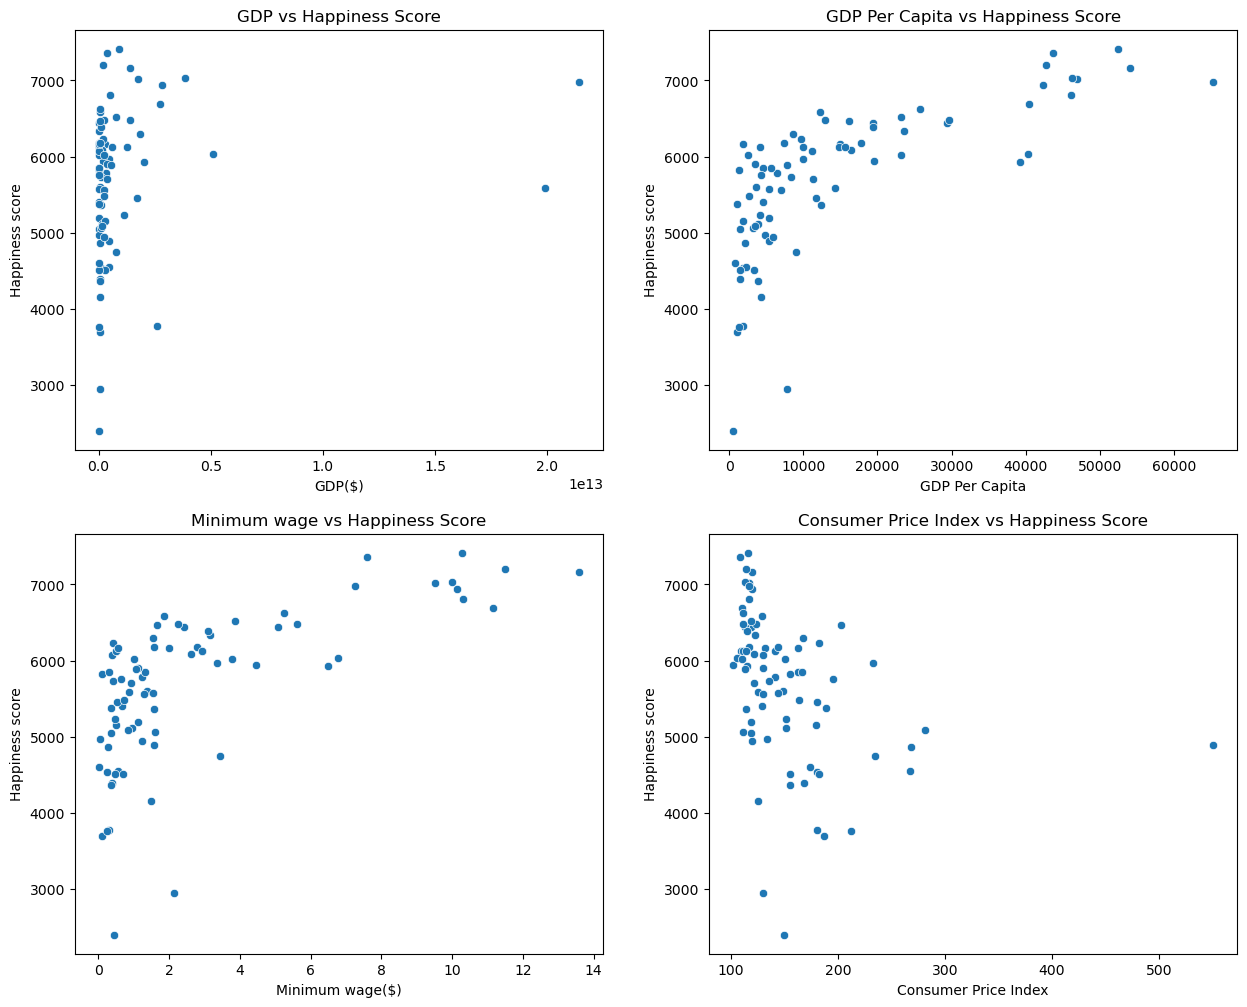

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# GDP vs Happiness Score
sns.scatterplot(x='GDP($)', y='Happiness score', data=merged_df, ax=axs[0, 0])
axs[0, 0].set_title('GDP vs Happiness Score')

# GDP Per Capita vs Happiness Score
sns.scatterplot(x='GDP Per Capita', y='Happiness score', data=merged_df, ax=axs[0, 1])
axs[0, 1].set_title('GDP Per Capita vs Happiness Score')

# Minimum wage vs Happiness Score
sns.scatterplot(x='Minimum wage($)', y='Happiness score', data=merged_df, ax=axs[1, 0])
axs[1, 0].set_title('Minimum wage vs Happiness Score')

# Consumer Price Index vs Happiness Score
sns.scatterplot(x='Consumer Price Index', y='Happiness score', data=merged_df, ax=axs[1, 1])
axs[1, 1].set_title('Consumer Price Index vs Happiness Score')

plt.show()

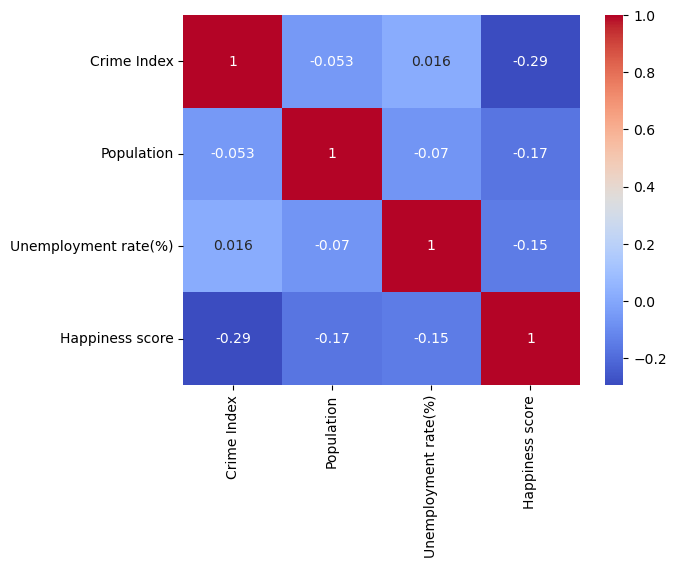

In [82]:
# Crime Heatmap
correlation = merged_df[['Crime Index', 'Population','Unemployment rate(%)','Happiness score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

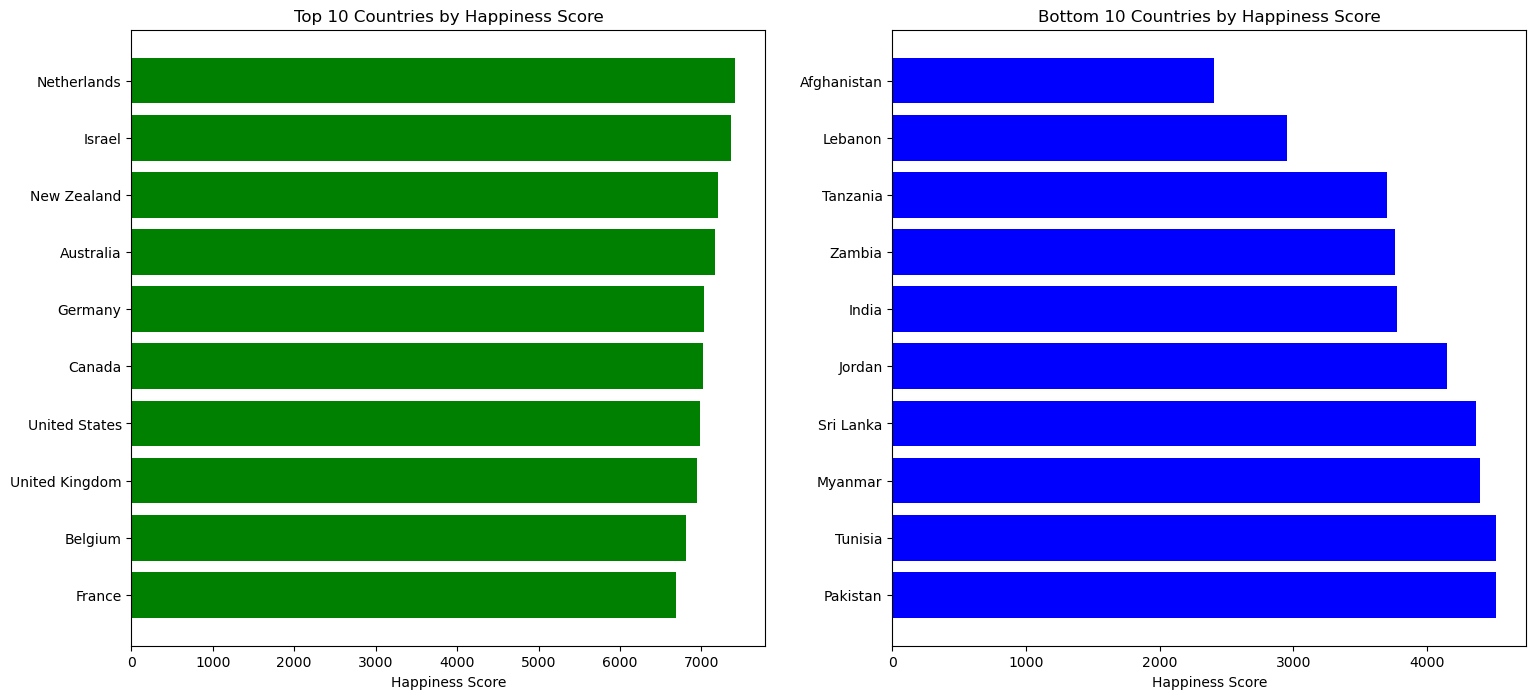

In [83]:
# Happiness Score
happiness_sorted = merged_df.sort_values('Happiness score', ascending=False)
plt.figure(figsize=(18, 8))

# Plot the top 10 countries with the highest Happiness Scores
plt.subplot(1, 2, 1)
plt.barh(happiness_sorted['Country'][:10], happiness_sorted['Happiness score'][:10], color='green')
plt.gca().invert_yaxis()  
plt.title('Top 10 Countries by Happiness Score')
plt.xlabel('Happiness Score')

# Plot the bottom 10 countries with the lowest Happiness Scores
plt.subplot(1, 2, 2)
plt.barh(happiness_sorted['Country'][-10:], happiness_sorted['Happiness score'][-10:], color='blue')
plt.title('Bottom 10 Countries by Happiness Score')
plt.xlabel('Happiness Score')

plt.show()


### Demography
Taking a deeper look into what happiness looks at by sub-region within continents:

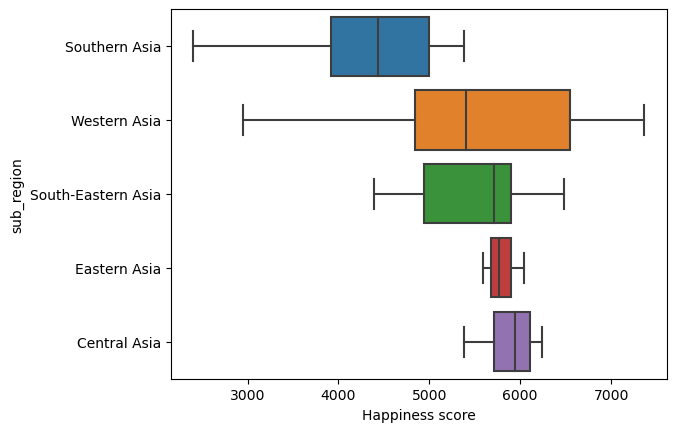

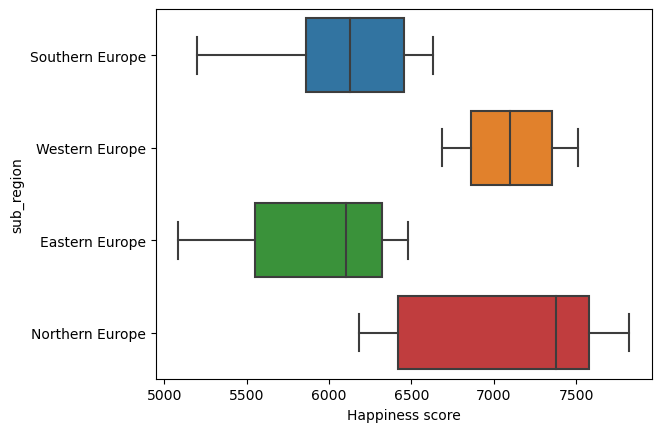

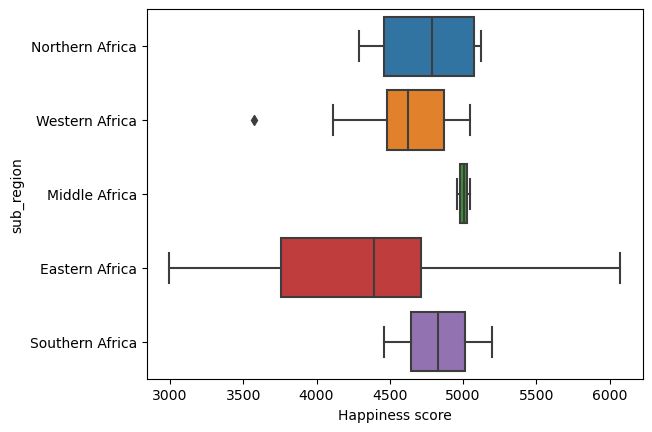

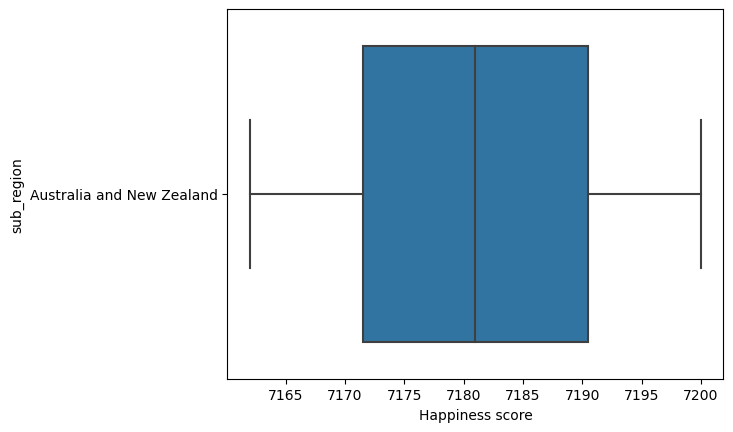

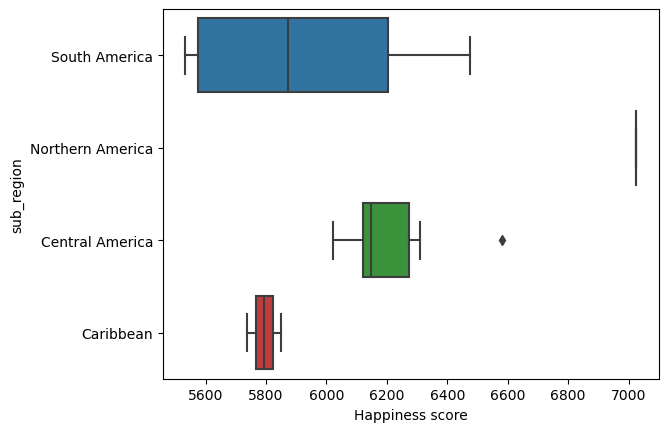

In [84]:
sns.boxplot(data = asia, x = "Happiness score", y = "sub_region")
plt.show()

sns.boxplot(data = europe, x = "Happiness score", y = "sub_region")
plt.show()

sns.boxplot(data = africa, x = "Happiness score", y = "sub_region")
plt.show()

sns.boxplot(data = oceania, x = "Happiness score", y = "sub_region")
plt.show()

sns.boxplot(data = americas, x = "Happiness score", y = "sub_region")
plt.show()

This correlation chart demonstrates the strength of correlation of the factors we are analyzing to each other.

In [85]:
corr = demography_df[['birth_rate', 'infant_mortality', 'life_expectancy', 
                      'maternal_mortality_ratio', 'Happiness score']].corr()
corr

,birth_rate,infant_mortality,life_expectancy,maternal_mortality_ratio,Happiness score
birth_rate,1.000000,0.885666,-0.880897,0.768152,-0.678604
infant_mortality,0.885666,1.000000,-0.920431,0.903213,-0.684371
life_expectancy,-0.880897,-0.920431,1.000000,-0.840118,0.746540
maternal_mortality_ratio,0.768152,0.903213,-0.840118,1.000000,-0.624706
Happiness score,-0.678604,-0.684371,0.746540,-0.624706,1.000000


A heatmap can be created to more effectively visualize the results.

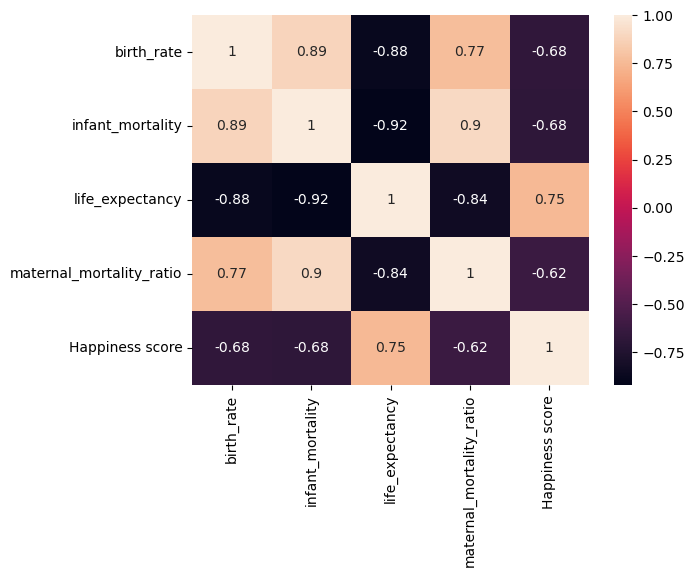

In [86]:
sns.heatmap(corr, annot=True)
plt.show()

Next, the means (averages) of the demography factors can be found according to continent and by geographic subregion. Because there is a lot of country data, this helps to possibly identify trends across groups.

In [87]:
continent_df = duckdb.sql("SELECT continent, AVG(birth_rate) AS \
average_birth_rate, AVG(infant_mortality) AS average_infant_mortality, \
AVG(life_expectancy) AS average_life_expectancy, \
AVG(maternal_mortality_ratio) AS average_maternal_mortality_ratio, \
AVG(\"Happiness score\") AS average_happiness_score FROM demography_df \
GROUP BY continent").df()
continent_df

,continent,average_birth_rate,average_infant_mortality,average_life_expectancy,average_maternal_mortality_ratio,average_happiness_score
0,Asia,18.640645,16.383871,74.096774,82.580645,5330.096774
1,Europe,9.749032,3.670968,79.422581,7.612903,6505.774194
2,Africa,30.866400,39.928000,64.648000,350.240000,4579.000000
3,Oceania,12.290000,3.900000,82.300000,7.500000,7181.000000
4,Americas,16.888235,11.882353,76.505882,58.470588,6076.176471


In [88]:
sub_region_df = duckdb.sql("SELECT sub_region, AVG(birth_rate) AS \
average_birth_rate, AVG(infant_mortality) AS average_infant_mortality, \
AVG(life_expectancy) AS average_life_expectancy, \
AVG(maternal_mortality_ratio) AS average_maternal_mortality_ratio, \
AVG(\"Happiness score\") AS average_happiness_score FROM demography_df \
GROUP BY sub_region").df()
sub_region_df

,sub_region,average_birth_rate,average_infant_mortality,average_life_expectancy,average_maternal_mortality_ratio,average_happiness_score
0,Southern Asia,22.083333,32.200000,70.100000,219.666667,4265.166667
1,Southern Europe,9.110909,3.954545,79.845455,7.363636,6072.818182
2,Northern Africa,21.790000,18.000000,75.375000,65.500000,4746.500000
3,Western Asia,16.861818,8.645455,76.663636,24.090909,5499.545455
4,Australia and New Zealand,12.290000,3.900000,82.300000,7.500000,7181.000000
5,Western Europe,10.083333,3.216667,82.000000,5.833333,7102.666667
6,Western Africa,35.601111,56.077778,60.411111,545.666667,4535.444444
7,South America,16.293750,10.862500,76.812500,61.000000,5919.625000
8,Eastern Europe,9.600000,5.250000,75.416667,11.166667,5922.000000
9,South-Eastern Asia,16.360000,17.314286,73.585714,111.714286,5465.714286


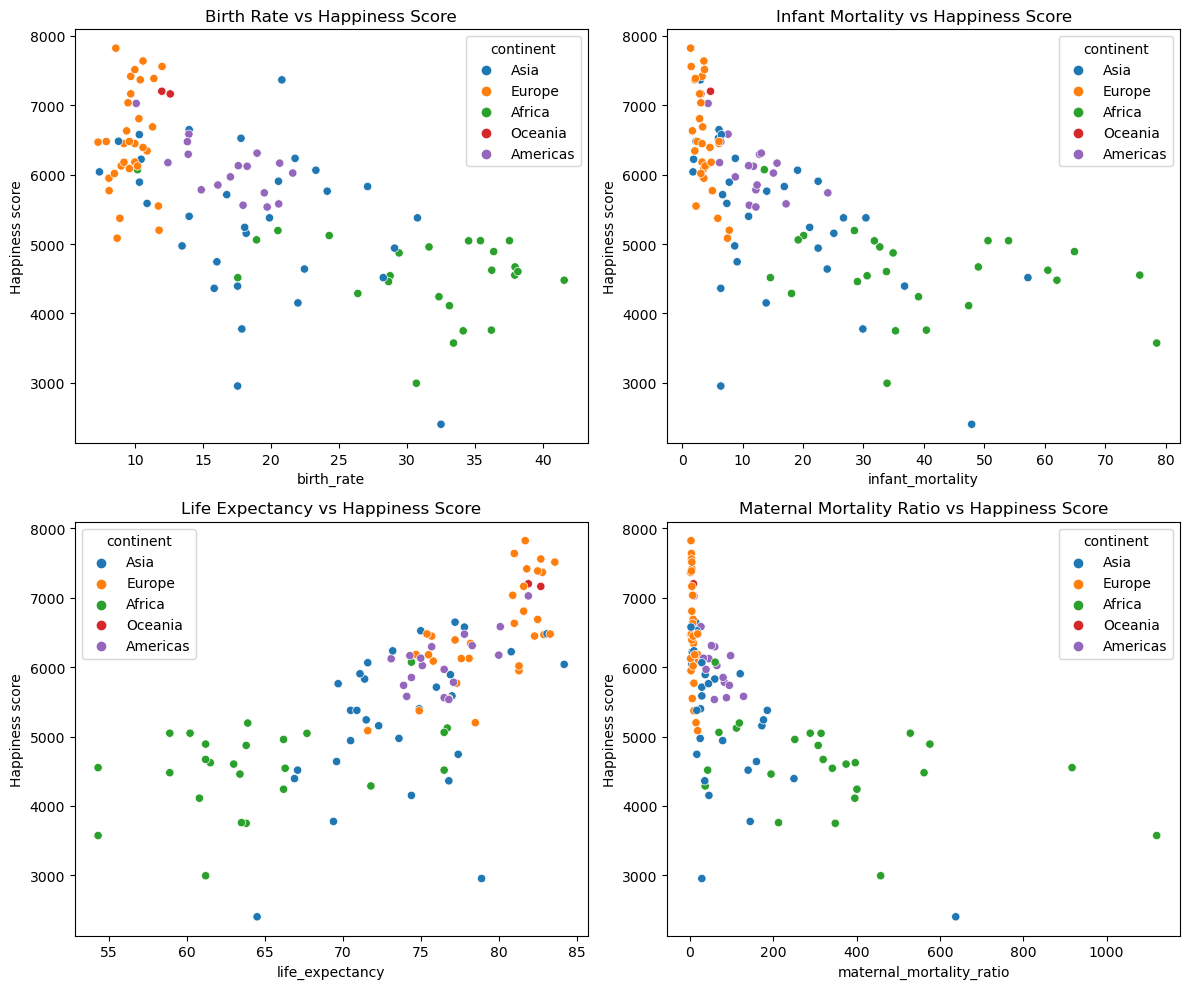

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=demography_df, x='birth_rate', y='Happiness score', hue='continent', ax=axes[0, 0])
sns.scatterplot(data=demography_df, x='infant_mortality', y='Happiness score', hue='continent', 
                ax=axes[0, 1])
sns.scatterplot(data=demography_df, x='life_expectancy', y='Happiness score', hue='continent', 
                ax=axes[1, 0])
sns.scatterplot(data=demography_df, x='maternal_mortality_ratio', y='Happiness score', hue='continent', 
                ax=axes[1, 1])

axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

plt.tight_layout()

plt.show()

Further analysis within Asian regions:

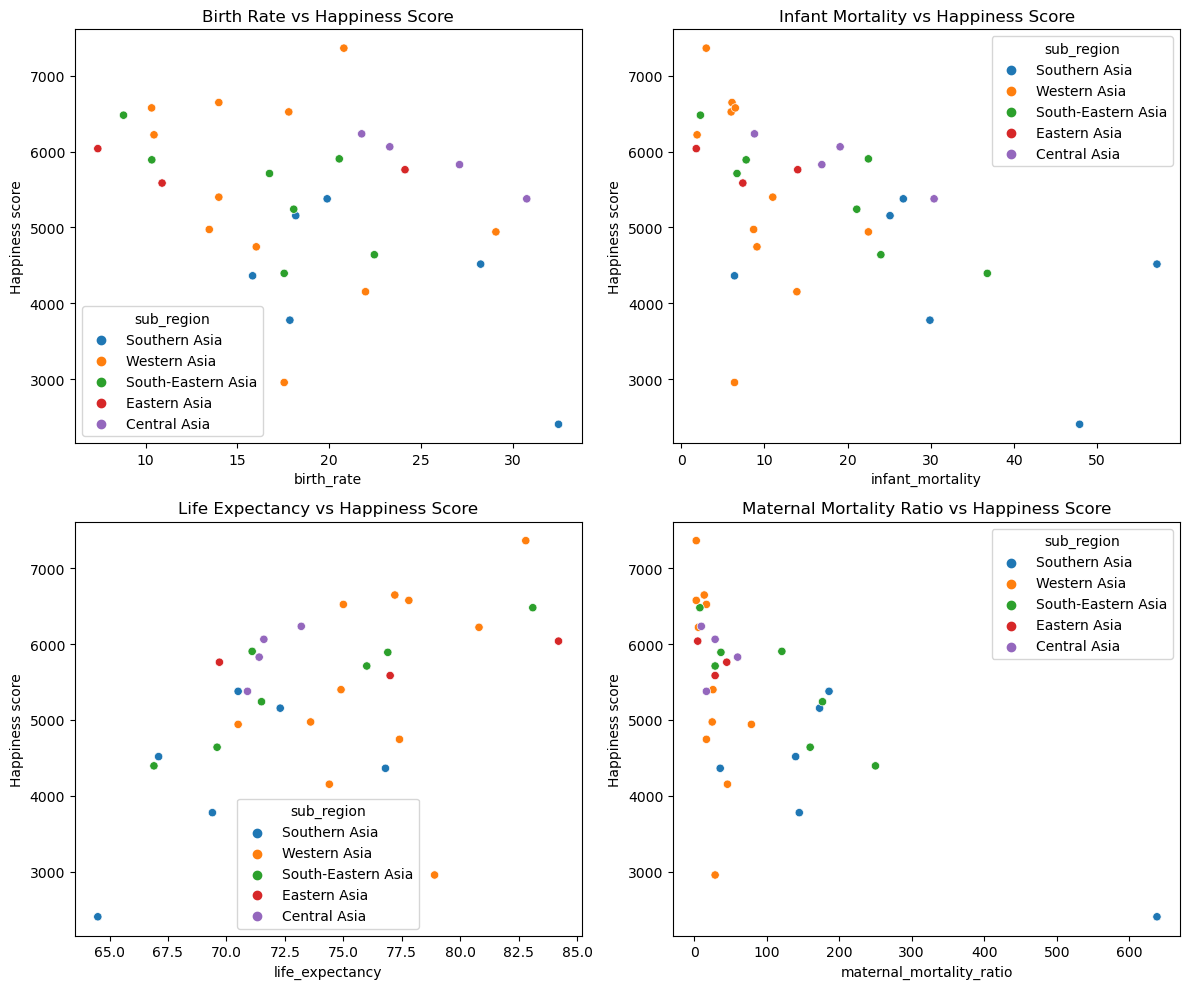

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=asia, x='birth_rate', y='Happiness score', hue='sub_region', ax=axes[0, 0])
sns.scatterplot(data=asia, x='infant_mortality', y='Happiness score', hue='sub_region', 
                ax=axes[0, 1])
sns.scatterplot(data=asia, x='life_expectancy', y='Happiness score', hue='sub_region', 
                ax=axes[1, 0])
sns.scatterplot(data=asia, x='maternal_mortality_ratio', y='Happiness score', hue='sub_region', 
                ax=axes[1, 1])

axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

plt.tight_layout()

plt.show()

Further analysis within European regions:

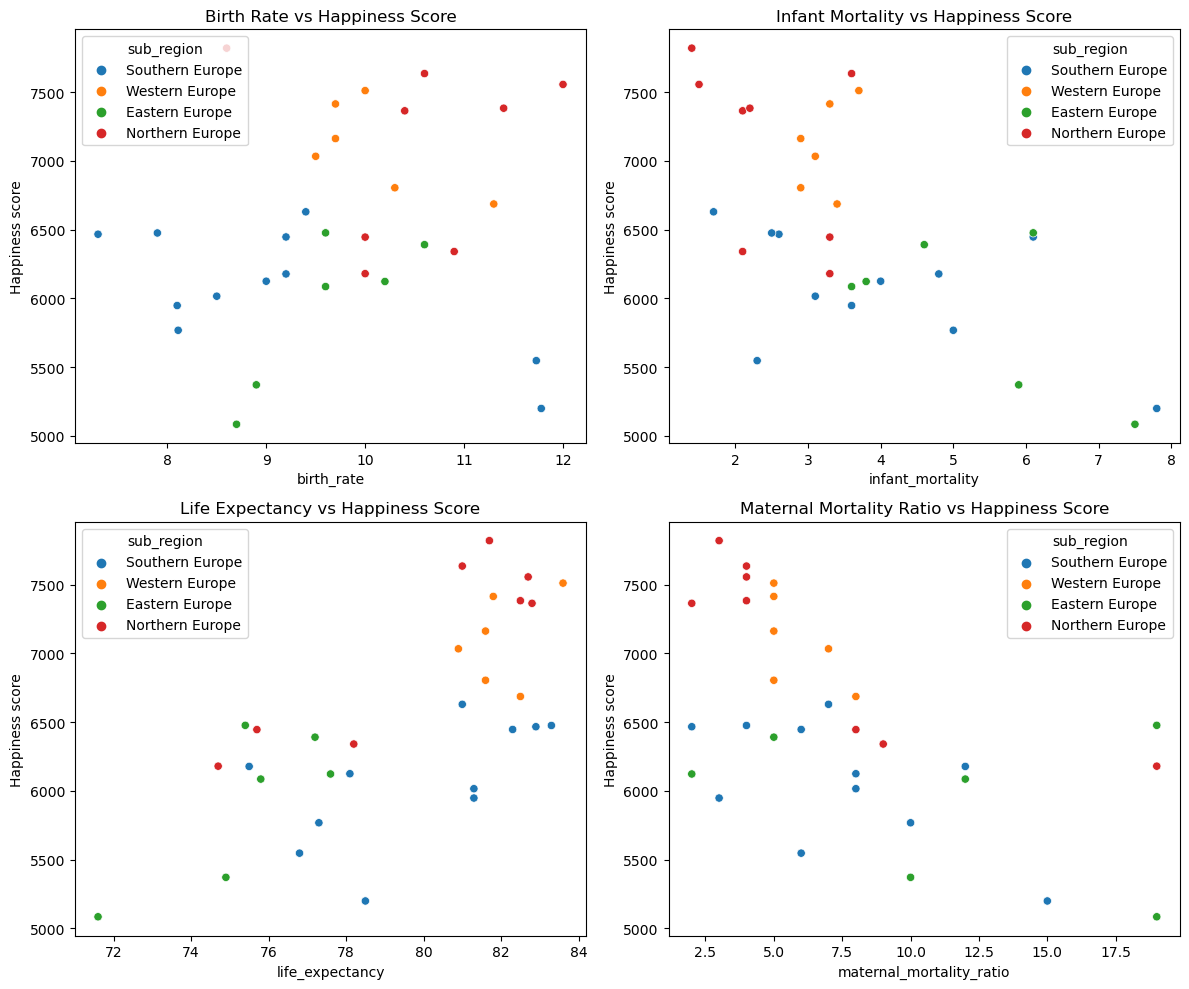

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=europe, x='birth_rate', y='Happiness score', hue='sub_region', ax=axes[0, 0])
sns.scatterplot(data=europe, x='infant_mortality', y='Happiness score', hue='sub_region', 
                ax=axes[0, 1])
sns.scatterplot(data=europe, x='life_expectancy', y='Happiness score', hue='sub_region', 
                ax=axes[1, 0])
sns.scatterplot(data=europe, x='maternal_mortality_ratio', y='Happiness score', hue='sub_region', 
                ax=axes[1, 1])

axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

plt.tight_layout()

plt.show()

Further analysis within African regions:

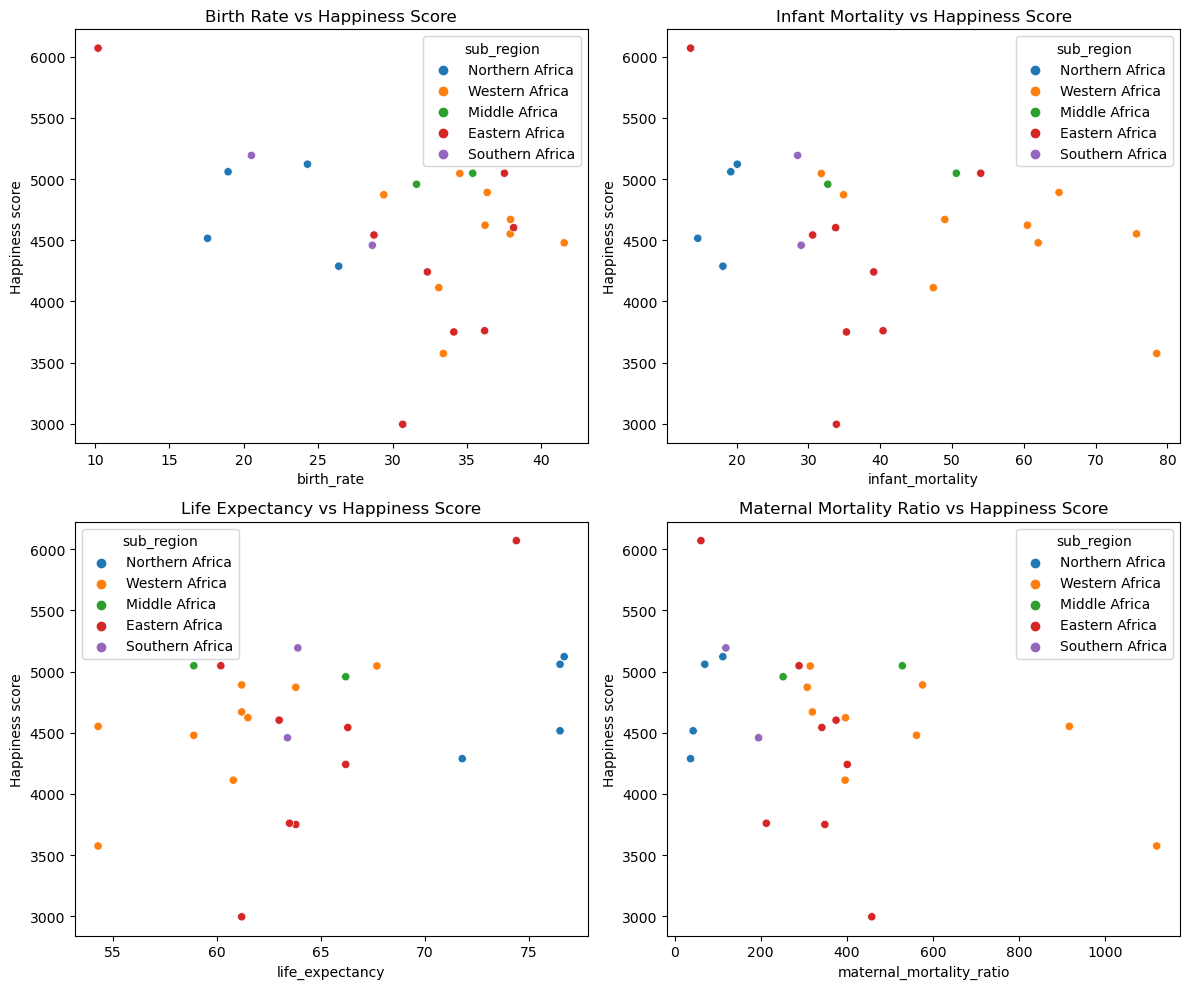

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=africa, x='birth_rate', y='Happiness score', hue='sub_region', ax=axes[0, 0])
sns.scatterplot(data=africa, x='infant_mortality', y='Happiness score', hue='sub_region', 
                ax=axes[0, 1])
sns.scatterplot(data=africa, x='life_expectancy', y='Happiness score', hue='sub_region', 
                ax=axes[1, 0])
sns.scatterplot(data=africa, x='maternal_mortality_ratio', y='Happiness score', hue='sub_region', 
                ax=axes[1, 1])

axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

plt.tight_layout()

plt.show()

Further analysis within Oceania region:
Note: there is only one subregion in this continent, so this analysis is not as informative.

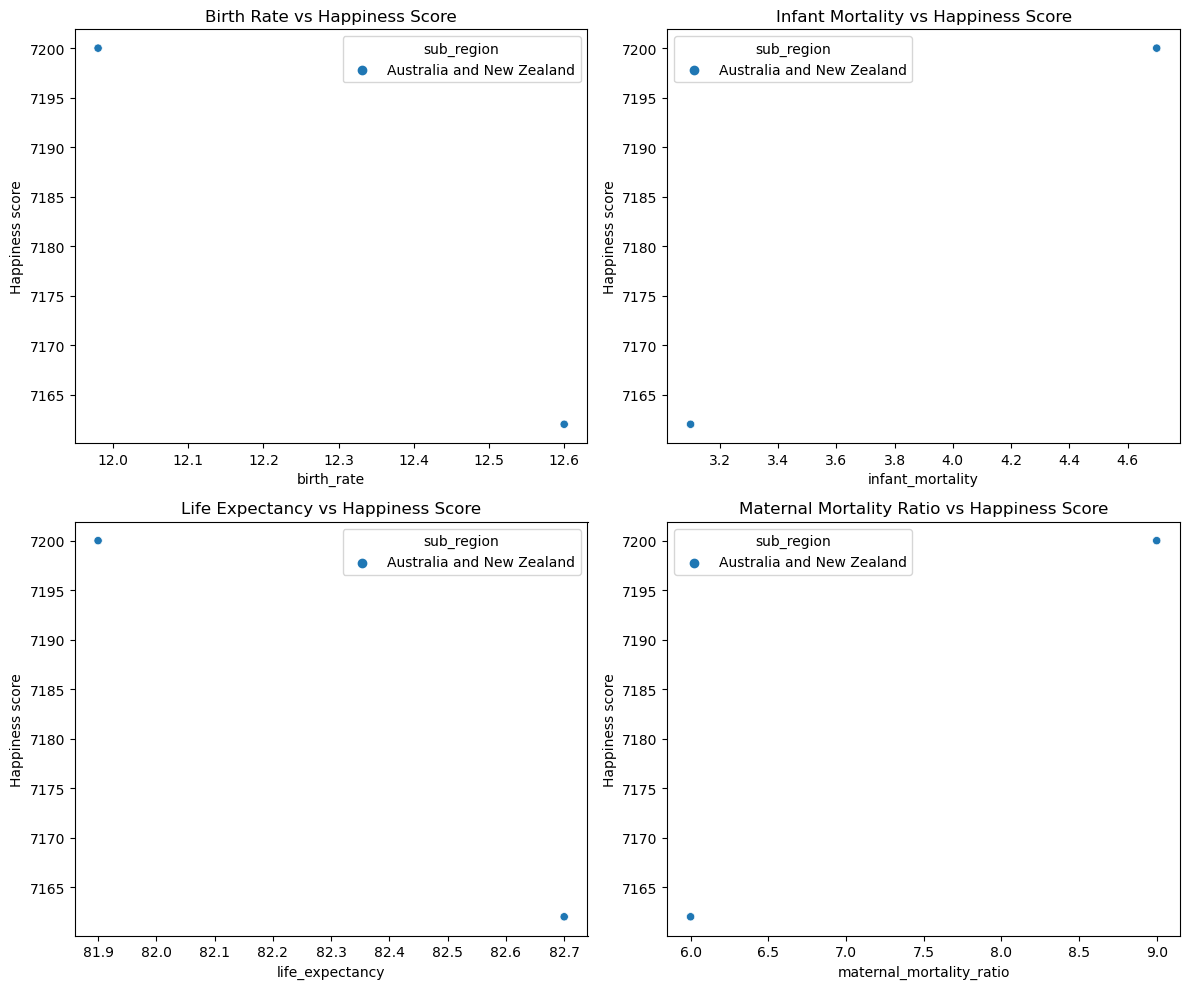

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the scatterplots on the subplots
sns.scatterplot(data=oceania, x='birth_rate', y='Happiness score', hue='sub_region', ax=axes[0, 0])
sns.scatterplot(data=oceania, x='infant_mortality', y='Happiness score', hue='sub_region', 
                ax=axes[0, 1])
sns.scatterplot(data=oceania, x='life_expectancy', y='Happiness score', hue='sub_region', 
                ax=axes[1, 0])
sns.scatterplot(data=oceania, x='maternal_mortality_ratio', y='Happiness score', hue='sub_region', 
                ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

# Add spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

Further analysis within the Americas:

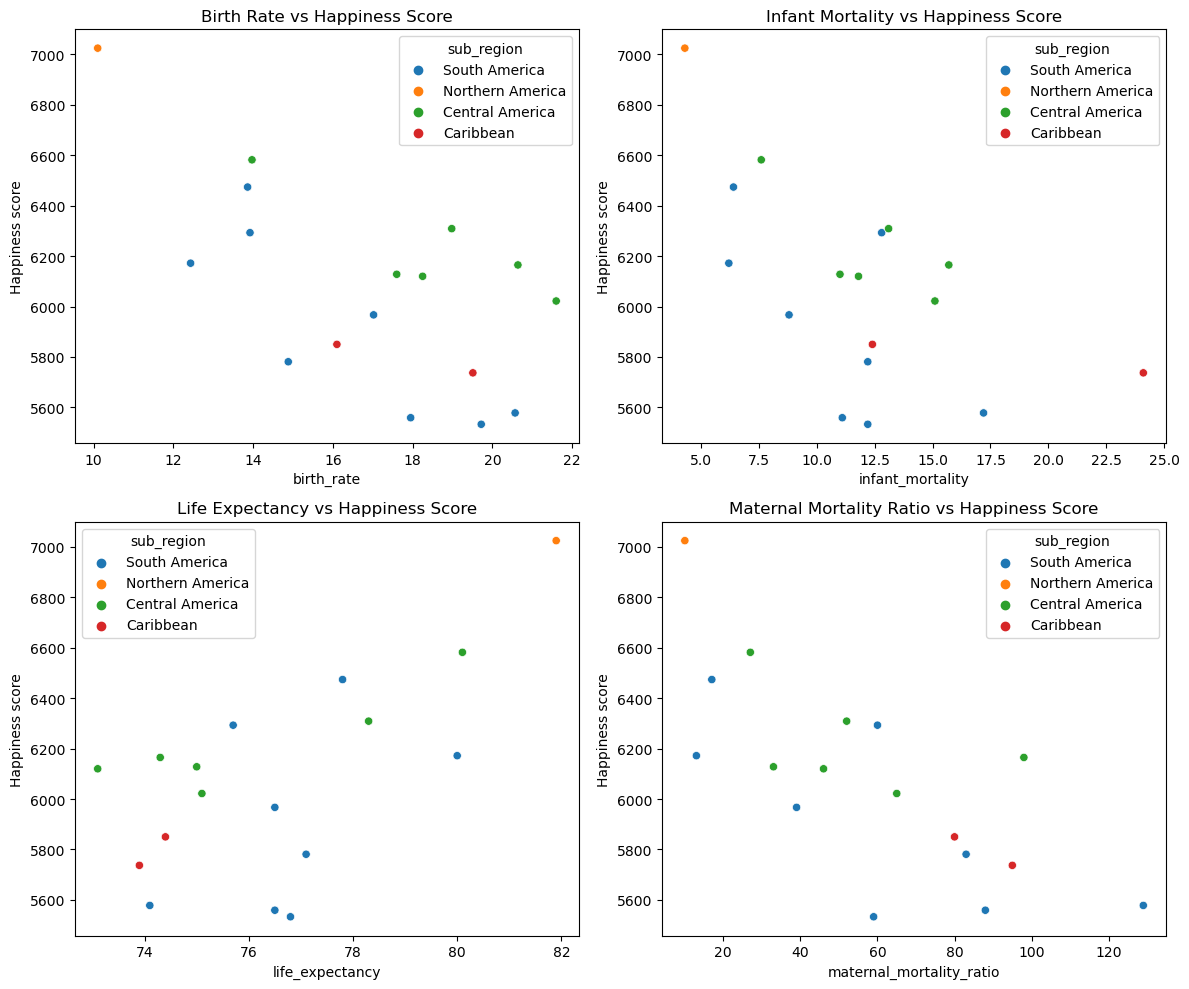

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=americas, x='birth_rate', y='Happiness score', hue='sub_region', ax=axes[0, 0])
sns.scatterplot(data=americas, x='infant_mortality', y='Happiness score', hue='sub_region', 
                ax=axes[0, 1])
sns.scatterplot(data=americas, x='life_expectancy', y='Happiness score', hue='sub_region', 
                ax=axes[1, 0])
sns.scatterplot(data=americas, x='maternal_mortality_ratio', y='Happiness score', hue='sub_region', 
                ax=axes[1, 1])

axes[0, 0].set_title('Birth Rate vs Happiness Score')
axes[0, 1].set_title('Infant Mortality vs Happiness Score')
axes[1, 0].set_title('Life Expectancy vs Happiness Score')
axes[1, 1].set_title('Maternal Mortality Ratio vs Happiness Score')

plt.tight_layout()

plt.show()

### Health

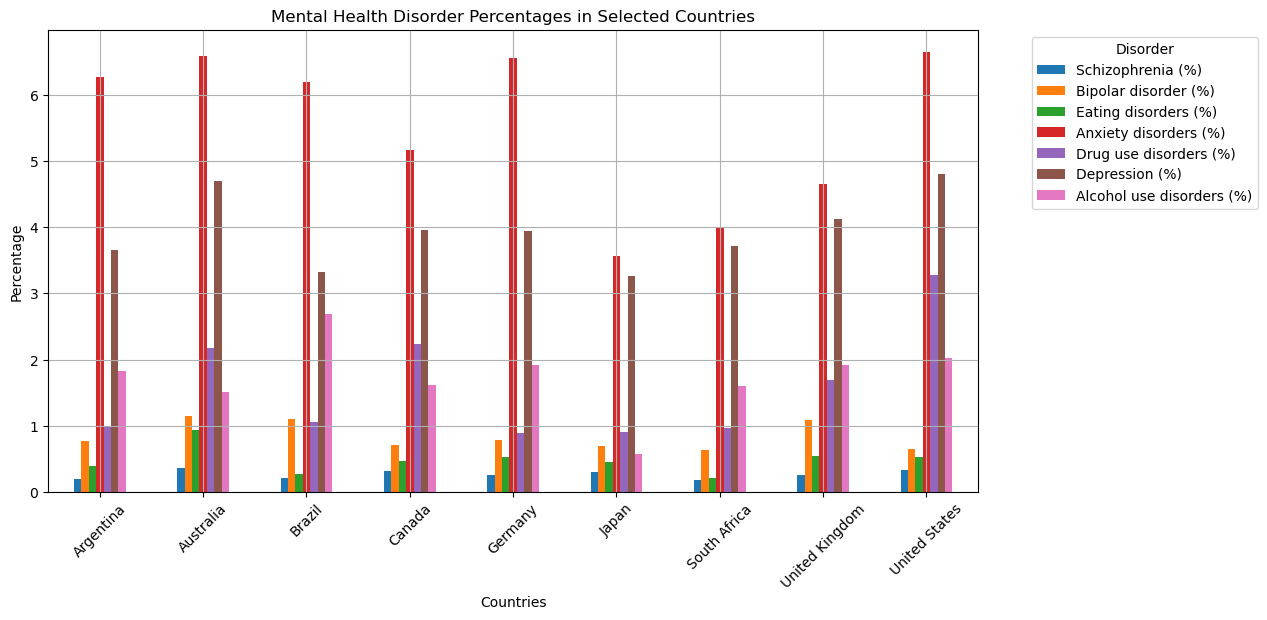

In [95]:
# Countries we are mainly looking at
selected_countries = ['United States',  'Brazil', 'United Kingdom',
             'Australia', 'South Africa', 'Canada', 'Germany',
             'Japan', 'Argentina']

# Filter it, include only the selected countries
health_select_df= health_df[health_df['Country'].isin(selected_countries)]

# List of all the disorders
disorders = ['Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']

# Make bar graph
ax = health_select_df.plot(x='Country', y=disorders, kind='bar', figsize=(12, 6) )
plt.title('Mental Health Disorder Percentages in Selected Countries')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

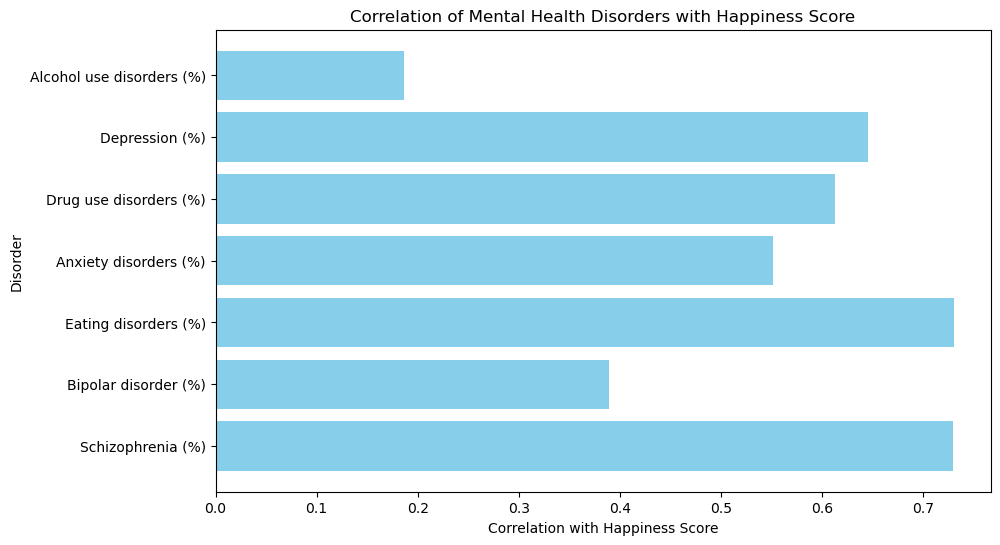

In [96]:
# Collects correlation from country disorder to happiness score
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
# https://stackoverflow.com/questions/38422001/pandas-dataframe-corrwith-method
correlations = health_select_df[disorders].corrwith(health_select_df['Happiness score'])

# Make new dataframe that collects correlation from all countries
# https://www.geeksforgeeks.org/python-pandas-index-values/
correlation_df = pd.DataFrame({'Disorder': correlations.index, 'Correlation': correlations.values})

# Makes bar graph
plt.figure(figsize=(10, 6))
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
plt.barh(correlation_df['Disorder'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Happiness Score')
plt.ylabel('Disorder')
plt.title('Correlation of Mental Health Disorders with Happiness Score')

plt.show()

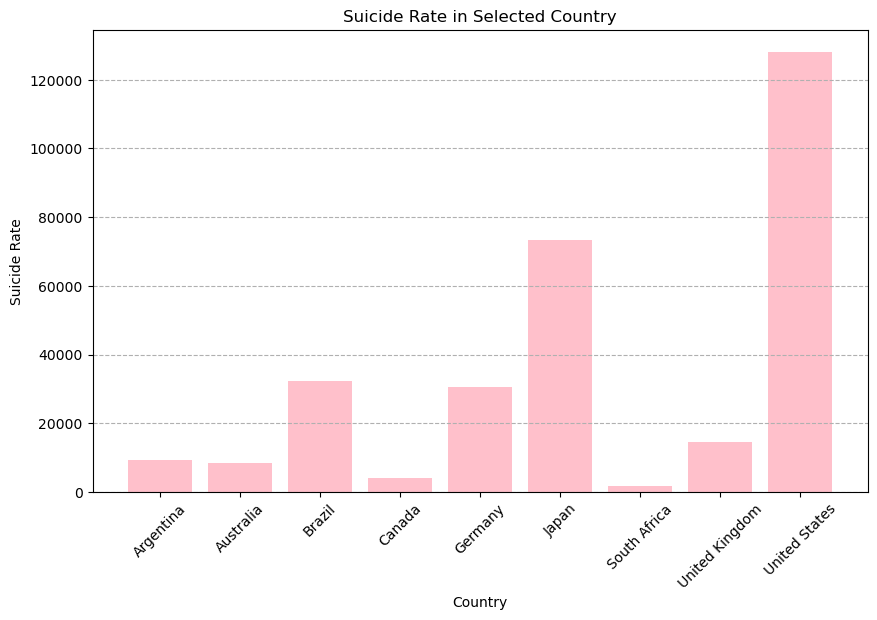

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(health_select_df['Country'], health_select_df['suicides_no'], color='pink')
plt.xlabel('Country')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate in Selected Country')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

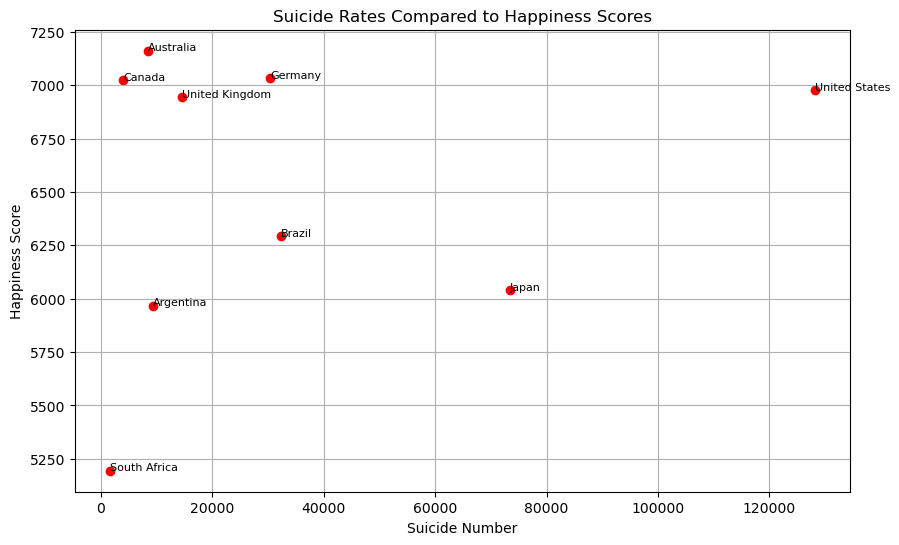

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(health_select_df['suicides_no'], health_select_df['Happiness score'], c='red', marker='o')

# make label for each point
# https://www.statology.org/pandas-scatter-plot-label-points/
for i, row in health_select_df.iterrows():
    plt.annotate(row['Country'], (row['suicides_no'], row['Happiness score']), fontsize=8)

plt.title('Suicide Rates Compared to Happiness Scores')
plt.xlabel('Suicide Number')
plt.ylabel('Happiness Score')
plt.grid()
plt.show()

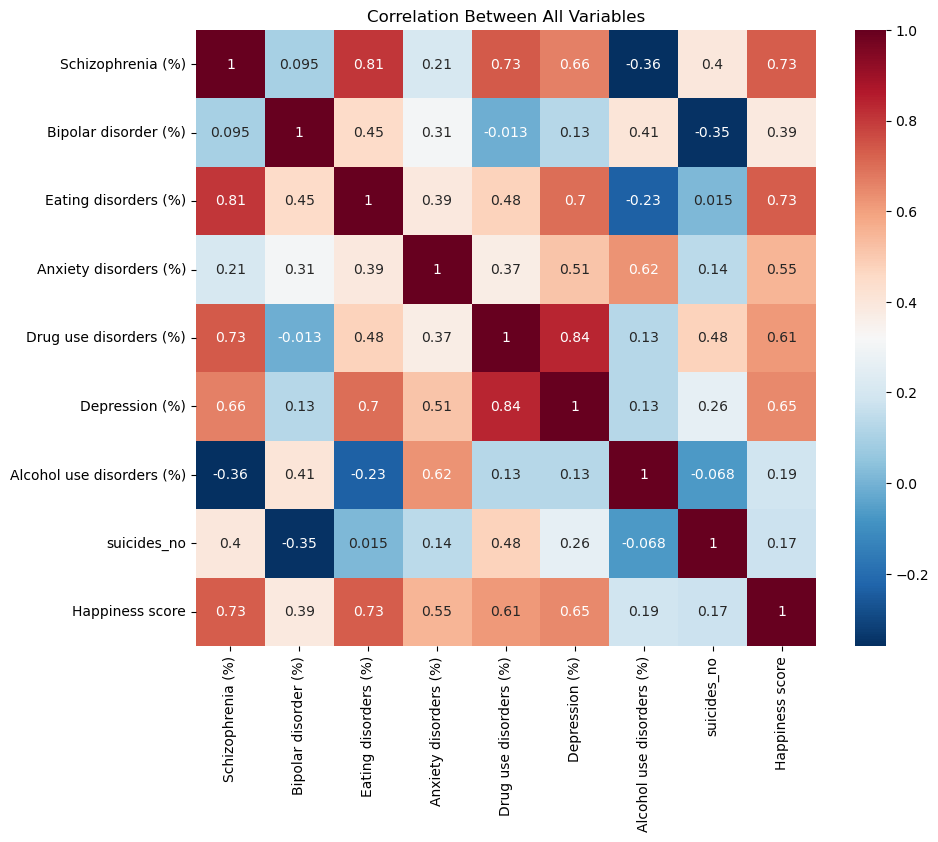

In [99]:
correlation_matrix2 = health_select_df.iloc[:, 1:].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='RdBu_r', cbar=True)
plt.title('Correlation Between All Variables')
plt.show()

## Data Limitations


__1.__ Here are some limitations of the health data:

  - The dataset from the Mental Health Disorder CSV contained dates from 1990 to 2017. Some countries like Albania only contained statistics up to the year 2015. Since the data was not up to date, it could cause inaccuracies in our dataset, making it difficult to make predictions on life satisfaction. 

  - The Mental Health Disorder CSV contained multiple NaN values on different years of different countries. Since there was missing data, our final output could be skewed depending on the years missing. 

  - The Suicide Number CSV could have accuracy problems through the collection process. It is hard to account for all the suicides globally since it doesn’t account for missing people, doesn’t account for underreportings, and we don’t know what constitutes as a suicide. 

  - When merging the different data frames, it was difficult to keep all the countries shared by the three data sets. Since we were inner joining, only countries that were on all datasets were included. 

__2.__ Though the global country information dataset is very comprehensive and has over 18,000 downloads, there isn’t clear documentation of its sources and how the data was collected. Thus, there is some ambiguity associated with reporting findings based on this data.

__3.__ The world happiness report data is not up to date to 2023, so we have chosen to use the most recent data collected from 2022 in our analysis. This could potentially alter our findings as it may not completely and accurately reflect the current situation.

__4.__ The world happiness report data was mainly collected through a survey, the Gallup World Survey. Thus, there could be selection biases in the responses and the data may not be completely representative of the whole population.

__5.__ The Crime Rate By Country 2023 CSV doesn’t clearly explain how the 'crime index' is calculated, which raises concerns about potential bias in data collection.

## Questions For Reviewers:



__1.__ We are unsure of how to find the “weight” of each factor in influencing happiness. Could you provide any insights as to how to approach this?

__2.__ We are interested in possibly doing prediction models using factors we are analyzing as inputs. However, we haven’t included time-series data for some of these factors. Is it still possible to do a prediction model, or should we pivot to a different question?

__3.__ For future analyses, will we need to derive a single equation that combines demographic, health, economic, and crime factors?
